### Question 1.2. Draw a line plot with years on the horizontal axis and murder rates on the vertical axis. Include two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call: ak mn.plot(’Year’).

In [11]:
import pandas as pd
import numpy as np
import io
from matplotlib import pyplot
from datascience import *
import random
from datascience import Table
import datascience as ds
%matplotlib inline
import matplotlib.pyplot as plt

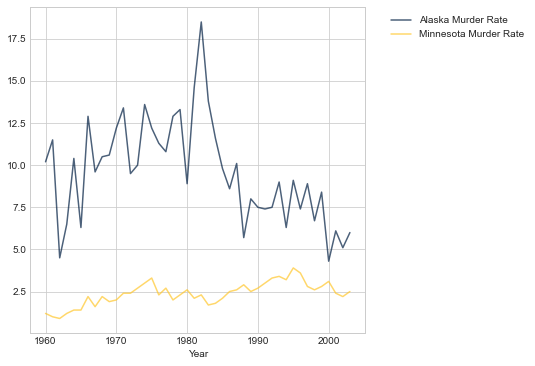

In [12]:
datainput = pd.read_csv('../Data/crime_rates.csv') 
datainput = datainput[['State','Year','Murder Rate','Population']]
murder_rate = Table.read_table('../Data/crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
Alaska = murder_rate.where('State', 'Alaska').drop('State', 'Population').relabeled(1, 'Alaska Murder Rate')
Minnesota = murder_rate.where('State', 'Minnesota').drop('State', 'Population').relabeled(1, 'Minnesota Murder Rate')
ak_mn = Alaska.join('Year', Minnesota,'Year')
ak_mn.plot('Year')

##  Question 1.3. Implement the function most murderous, which takes a year (an integer) as its argument.
### It does two things:
### 1. It draws a horizontal bar chart of the 5 states that had the highest murder rate in that year.
### 2. It returns an array of the names of these states in order of increasing murder rate.

['California' 'Mississippi' 'Texas' 'New York' 'Louisiana']


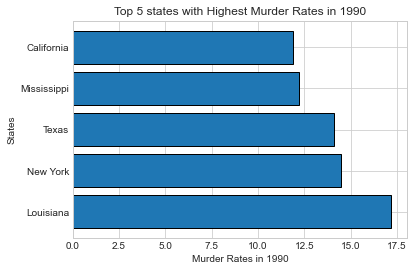

In [13]:
def most_murderous(year):
    group=datainput.groupby('Year')
    data=group.get_group(year)
    highest5=data.sort_values('Murder Rate',ascending=False).head(5).reset_index()[['State','Murder Rate']]
    b=np.array(highest5['State'])
    print(b[::-1]) 

    plt.barh(highest5['State'],highest5['Murder Rate'])
    plt.title('Top 5 states with Highest Murder Rates in 1990')
    plt.ylabel('States')
    plt.xlabel('Murder Rates in 1990')
    plt.show()
most_murderous(1990)

### Question 1.4. How many more people were murdered in California in 1988 than in 1975? Assign ca change to the answer.

In [16]:
murder_rate_in_california_1988=datainput[(datainput['State']=='California') & (datainput['Year']==1988)].reset_index()[['Population','Murder Rate']]
Total_murders_california=((murder_rate_in_california_1988['Population']*murder_rate_in_california_1988['Murder Rate'])/100000).tolist()
murder_rate_in_california_1975=datainput[(datainput['State']=='California') & (datainput['Year']==1975)].reset_index()[['Population','Murder Rate']]
Total_murders_california_1975=((murder_rate_in_california_1975['Population']*murder_rate_in_california_1975['Murder Rate'])/100000).tolist()
ca_change=Total_murders_california[0]-Total_murders_california_1975[0]
ca_change=np.round(ca_change)
print(" Number of more people murdered in California in 1988 than in 1975:", ca_change)

 Number of more people murdered in California in 1988 than in 1975: 726.0


### Question 2.1. Implement the function two year changes that takes an array of murder rates for a state, ordered by increasing year. For all two-year periods (e.g., from 1960 to 1962), it computes and returns the number of increases minus the number of decreases.

In [17]:
differences_among_states =[] 
def two_year_changes (values, m): 
    x=[]
    y=[] 
    x1=np.array(values)[m:] - np.array(values)[:-m]
    y1=np.array(values)[m:]
    z1=np.array(values)[:-m]
    for temp in range(len(y1)):
        if y1[temp]>z1[temp]:
            x.append(True)
        if y1[temp]<z1[temp]:
            y.append(False)
        else:
            continue
    differences_among_states.append(len(x)-len(y))
for state_one in datainput['State'].unique():
       year=datainput[datainput['State']==state_one]['Year'].tolist()
       rate=datainput[datainput['State']==state_one]['Murder Rate'].tolist()
       two_year_changes(rate,2) 
print(differences_among_states)

[-5, -6, -1, 1, 17, -4, 4, -3, -6, -3, -2, 4, -3, 8, 5, 5, -6, 8, 2, 9, 5, -4, 6, 0, -2, 0, -10, 1, 5, -3, 10, -1, 5, 3, 3, 1, -1, 5, 6, -11, -3, -2, 2, 5, -8, -1, 6, 1, 3, 0]


### Question 2.2. Assign changes by state to a table with one row per state that has two columns: the State name and the Murder Rate two year changes statistic computed across all years in our data set for that state.

In [19]:
datainput1=pd.DataFrame(datainput['State'].unique())
datainput1.columns = ['State']
datainput1['Two year changes in Murder rate']=pd.DataFrame(differences_among_states)
print(datainput1)

             State  Two year changes in Murder rate
0           Alaska                               -5
1          Alabama                               -6
2         Arkansas                               -1
3          Arizona                                1
4       California                               17
5         Colorado                               -4
6      Connecticut                                4
7         Delaware                               -3
8          Florida                               -6
9          Georgia                               -3
10          Hawaii                               -2
11            Iowa                                4
12           Idaho                               -3
13        Illinois                                8
14         Indiana                                5
15          Kansas                                5
16        Kentucky                               -6
17       Louisiana                                8
18      Mass

### Question 2.3. Assign total changes to the total increases minus the total decreases for all two-year periods and all states in our data set.


In [21]:
total_changes = sum(differences_among_states)
print('Total increases minus the total decreases for all two-year periods and all states in our data set:', total_changes)

Total increases minus the total decreases for all two-year periods and all states in our data set: 45


### Question 2.4. Set num changes to the number of different two-year periods in the entire data set that could result in a change of a state’s murder rate. Include both those periods where a change occurred and the periods where a state’s rate happened to stay the same.

In [26]:
change_in_number=[]
for state in datainput['State'].unique():
    n=datainput[datainput['State']==state]
    year=n['Year']
    change_in_number.append(len(np.array(year)[2:]-np.array(year)[:-2]))
print(f'change_in_number : {sum(change_in_number)}')

change_in_number : 2100


### Question 2.5. Given these null and alternative hypotheses, define a good test statistic.

### TEST STATISTIC :Number of Increase minus Number of Decrease. 
#### Large positive numbers support the alternative hypothesis, while smaller positive values support the null hypothesis.
#### This test statistic is only concerned with whether or not murder rates have increased or decreased, not with the magnitude of the change.

## Question 2.6. Complete the simulation below, which samples num changes increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis. Your job is to
### fill in the function simulate under null, which simulates a single sample under the null hypothesis, and
### fill in its argument when it’s called below.

In [30]:
uniformsamples = Table().with_columns("Change", make_array('Increase', 'Decrease'),"Chance", make_array(0.5,0.5))
uniformsamples.sample_from_distribution('Chance', 100)
sum(change_in_number)

2100

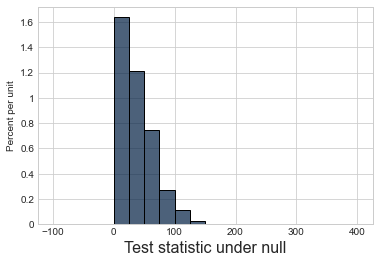

In [33]:
def simulate_under_null(num_chances_to_change):
  sample = uniformsamples.sample_from_distribution("Chance", num_chances_to_change).column(2)
  increases = sample.item(0)
  decreases = sample.item(1)
  return abs(increases - decreases)
uniformsamples_samples = make_array()
for i in np.arange(5000):
 uniformsamples_samples = np.append(uniformsamples_samples, simulate_under_null(sum(change_in_number)))
Table().with_column('Test statistic under null', uniformsamples_samples).hist(0,bins=np.arange(-100, 400+25, 25))

### Question 2.7. Looking at this histogram, draw a conclusion about whether murder rates basically increase as often as they decrease.

### Answer:Looking at the Histogram, it appears that murder rates are increasing rather than decreasing. As a result, we can rule out the Null Hypothesis.

### Question 3.1. Describe this investigation in terms of an experiment. What population are we studying? What is the control group? What is the treatment group? What outcome are we measuring?


## Answer:
### Population: All persons who live in the United States
### Control Group: People who lived in states where the death penalty was not in effect
### Treatment Group: People who lived in states where the death penalty was in effect
### Outcome: The state's murder rate

### Question 3.2. We want to know whether the death penalty causes a change in the murder rate. Why is it not sufficient to compare murder rates in places and times when the death penalty was in force with places and times when it wasn’t?

### Murder rates in all states could be high or less in various years. As a result, comparing states that have the death penalty one year to those that do not have the death penalty the next year could result in a skewed result. Furthermore, due to population size, geography, types of population, and other factors, some states will have a larger or smaller total murder rate, so we must account for this.

### Question 3.3. Assign death penalty murder rates to a table with the same columns and data as murder rates, but that has only the rows for states that had the death penalty in 1971.

In [34]:
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
def had_death_penalty_in_1971(state):
    """Returns True if the argument is the name of a state that had the death penalty in 1971."""
    # The implementation of this function uses a bit of syntax
    # we haven't seen before.  Just trust that it behaves as its
    # documentation claims.
    return state not in non_death_penalty_states
states = murder_rate.group('State').select('State')
death_penalty_in_1971 = states.with_column('Death Penalty', states.apply(had_death_penalty_in_1971, 0))
death_penalty_in_1971
states_with_death_penalty = death_penalty_in_1971.where("Death Penalty", are.equal_to(True))
death_penalty_murder_rates = murder_rate.where("State", are.equal_to(states_with_death_penalty.column("State")))
death_penalty_murder_rates

C:\Users\16197\anaconda3\lib\site-packages\datascience\predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \


State,Year,Population,Murder Rate
Alabama,1960,3266740,12.4
Alabama,1961,3302000,12.9
Alabama,1962,3358000,9.4
Alabama,1963,3347000,10.2
Alabama,1964,3407000,9.3
Alabama,1965,3462000,11.4
Alabama,1966,3517000,10.9
Alabama,1967,3540000,11.7
Alabama,1968,3566000,11.8
Alabama,1969,3531000,13.7


### Question 3.4. Assign changes 72 to the value of the test statistic for the years 1971 to 1973 and the states in death penalty murder rates.

In [48]:
stats= death_penalty_murder_rates.where('Year',are.between(1971,1974))
number=stats('State',distinct =True)
differences = make_array()
for i in np.arange(len(s_71to73)):
    s = diff_n(stats.where('State',number[i]).column(3),2)
differences = np.append(differences,s)
test_stat_72 = np.count_nonzero(differences<0)-np.count_nonzero(differences>0)
print('Increases minus decreases from 1971 to 1973:', test_stat_72)

Increases minus decreases from 1971 to 1973: 22


### Question 3.5. Draw an empirical histogram of the statistic under the null hypothesis by simulating the test statistic 5,000 times.

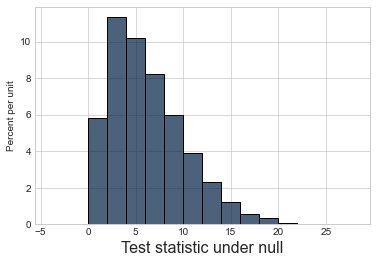

In [42]:
makearrays = make_array()
for i in np.arange(10000):
    simulate=simulate_under_null(len(number))
    makearrays = np.append(makearrays,simulate)
Table().with_column('Test statistic under null', makearrays).hist(bins=np.arange(-4, 28+2, 2))

### Question 3.6. Complete the analysis as follows:
#### 1. Compute a P-value.
#### 2. Draw a conclusion about the null and alternative hypotheses.
#### 3. Describe your findings using simple, non-technical language. Be careful not to claim that the statistical analysis has established more than it really has.


P-Value is : 0.0011001100110011


(array([1167., 2266.,    0., 2034.,    0., 1642., 1196.,    0.,  781.,
           0.,  464.,  243.,    0.,  116.,    0.,   65.,   15.,    0.,
           8.,    3.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ,
        13.2, 14.4, 15.6, 16.8, 18. , 19.2, 20.4, 21.6, 22.8, 24. ]),
 <BarContainer object of 20 artists>)

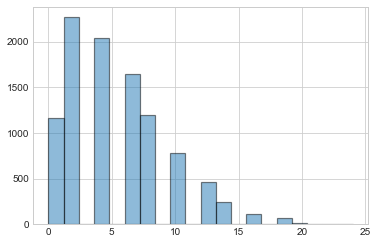

In [50]:
newarray=np.array(newarray)
empirical_P=np.count_nonzero(newarray >= abs(test_stat_72) ) / i
print('P-Value is :',empirical_P)
pyplot.hist(makearrays,bins=20,alpha=0.5,edgecolor='black',linewidth=1.2)

### Question 4.1. Implement run test, which takes the following arguments:
#### A table of murder rates for certain states, sorted by state and year like murder rates, and
#### the year when the analysis starts. (The comparison group is two years later.) It prints out the observed test statistic and returns the P-value for this statistic under the null hypothesis

In [51]:
test_run=[]
uniformsamples = Table().with_columns("Change", ds.make_array('Increase', 'Decrease'),"Chance", ds.make_array(0.5,0.5))
test_statistics=uniformsamples.sample_from_distribution('Chance', 100)

def run_test(size,start_year):
    test_run.append(uniformsamples.sample_from_distribution('Chance',100).column(2).item(0)-uniformsamples.sample_from_distribution('Chance', 100).column(2).item(1))
          
for sample_test in range(5000):
    run_test(44,1971)  
test_values=np.array(test_run)
empirical_P=np.count_nonzero(test_values>=22) / sample_test
print('test static from 1971 to 1973:', test_stat_72)
print("P-Value :",empirical_P)
run_test(death_penalty_murder_rates,1971)

test static from 1971 to 1973: 22
P-Value : 0.001200240048009602


### Question 4.3. Now we’ve analyzed states where the death penalty went away and came back, as well as states where the death penalty was outlawed all along. What do you conclude from the results of the tests we have conducted so far? Does all the evidence consistently point toward one conclusion, or is there a contradiction?



### Answer:Our findings support the hypothesis that the death penalty suspension increased the number of murders. Our findings suggest that the death penalty suspension boosted murder rates, but we haven't taken time into account as a potential determinant. Our findings prevent us from drawing any conclusions concerning murder rates or the use of capital punishment.Our findings lead us to believe that the death penalty suspension had no effect on murder rates.


### Question 5.1. Create a table called average murder rates with 1 row for each year in murder rates. It
#### should have 3 columns:
#### • Year, the year,
#### • Death penalty states, the average murder rate of the states that had the death penalty and
#### • No death penalty states, the average murder rate of the other states.
#### average murder rates should be sorted in increasing order by year

In [53]:
datainput=pd.read_csv('../Data/crime_rates.csv')
difference_in_mean=[]
difference_in_mean_in_six_states=[]
datainput=datainput[['State','Year','Population','Murder Rate']]
datainput1=datainput[(datainput['State']!='Alaska') & (datainput['State']!='Hawaii') & (datainput['State']!='Maine') & (datainput['State']!='Michigan') & (datainput['State']!='Wisconsin')&(idatainput['State']!='Minnesota')].reset_index()
data_frame=input_data1['Year'].unique()
df=input_data1.groupby('Year')
for year in data_frame:
    group=df.get_group(year)
    difference_in_mean.append(group['Murder Rate'].mean())
datainput7=datainput[(datainput['State']=='Alaska') | (datainput['State']=='Hawaii') | (datainput['State']=='Maine') | (datainput['State']=='Michigan') | (datainput['State']=='Wisconsin')|(datainput['State']=='Minnesota')].reset_index()
df2=datainput7.groupby('Year')
for year_no in data_frame:
    group1=df2.get_group(year_no)
    difference_in_mean_in_six_states.append(group1['Murder Rate'].mean())
average_murder_rates=pd.DataFrame(data_frame)
average_murder_rates.columns=['Year']
average_murder_rates['Death penalty states']=difference_in_mean
average_murder_rates['No death penalty states']=difference_in_mean_in_six_states
print(average_murder_rates)

    Year  Death penalty states  No death penalty states
0   1960              5.279545                 3.550000
1   1961              4.777273                 3.683333
2   1962              4.615909                 2.333333
3   1963              4.613636                 2.750000
4   1964              4.711364                 3.400000
5   1965              4.827273                 3.183333
6   1966              5.431818                 4.516667
7   1967              5.875000                 3.733333
8   1968              6.270455                 4.733333
9   1969              6.502273                 4.733333
10  1970              7.147727                 5.116667
11  1971              7.513636                 6.066667
12  1972              7.765909                 6.300000
13  1973              8.120455                 5.800000
14  1974              8.554545                 7.300000
15  1975              8.454545                 6.866667
16  1976              7.552273                 6

### Question 5.2. Describe in one short sentence a high-level takeaway from the line plot below. Are the murder rates in these two groups of states related? average murder rates.plot(’Year’).

<AxesSubplot:xlabel='Year'>

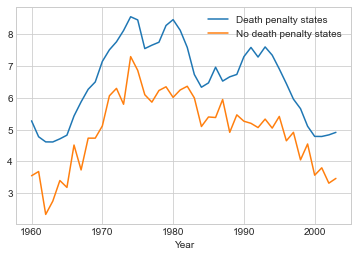

In [56]:
average_murder_rates.plot('Year')


### Murder rates appears to increase and decline in synch across all states, with and without the death penalty, although those without the death penalty had consistently lower murder rates during this time span.

### Question 5.3. Complete their argument in 2-3 sentences; what features of these plots indicate that the death penalty is not an important factor in determining the murder rate? (If you’re stuck, read the paper.)

### Answer: In the plot above it is evident that the average murder rate in states with death penalty are higher than the average murder rate in styates without death penalty. Even Then We cannot attribute the increase in murder rates in the United States between 1972 and 1976 to the removal of the death penalty; prior to the abolition, murder rates had been consistently growing for around 9 years (1963-1972) in  the United States. We witness a gradual drop in murder rates after the death sentence was restored in the United States until 2001, with peaks around 1982 and 1992.

### Question 5.5. What assumption(s) did we make in Parts 1 through 4 of the project that led us to believe that the death penalty deterred murder, when in fact the line plots tell a different story?

### Answer:The graph demonstrates that neither the removal nor the reinstatement of the death penalty is a direct cause of changes in murder rates. This is backed up by data from the study. For starters, we can't assume causation because of variables like place and time.Although we used a natural experiment to adjust for differences between states, our research was limited to the United States and did not take into consideration trends in other nations. Furthermore, trend lines across groups of U.S. states with and without the death penalty follow the same pattern, indicating the possibility of confounding factors other than the death sentence having an effect on murder rates.There does not appear to be a link between rises and drops in murder rates and whether a state possesses the death penalty or not. Murder rates appear to follow a similar pattern throughout states, regardless of whether or not the region has the death penalty in place.